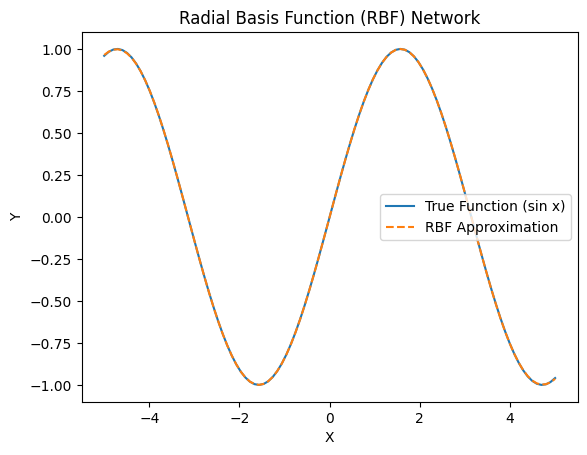

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Radial Basis Function
def gaussian_rbf(x, center, sigma):
    return np.exp(-np.linalg.norm(x - center) ** 2 / (2 * sigma ** 2))

# RBF Network class
class RBFNetwork:
    def __init__(self, centers, sigma):
        self.centers = np.array(centers)
        self.sigma = sigma
        self.weights = np.random.randn(len(centers))
    
    def _calculate_activations(self, X):
        # Calculate RBF activations for each input
        activations = np.zeros((len(X), len(self.centers)))
        for i, x in enumerate(X):
            for j, c in enumerate(self.centers):
                activations[i, j] = gaussian_rbf(x, c, self.sigma)
        return activations

    def fit(self, X, y):
        # Compute activations
        activations = self._calculate_activations(X)
        # Compute weights using least squares (pseudo-inverse)
        self.weights = np.linalg.pinv(activations).dot(y)

    def predict(self, X):
        activations = self._calculate_activations(X)
        return activations.dot(self.weights)

# Sample data (function approximation)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X).ravel()  # target function

# Define RBF centers and sigma
centers = np.linspace(-5, 5, 10).reshape(-1, 1)
sigma = 1.0

# Train RBF Network
rbf = RBFNetwork(centers, sigma)
rbf.fit(X, y)
y_pred = rbf.predict(X)

# Plot results
plt.plot(X, y, label='True Function (sin x)')
plt.plot(X, y_pred, label='RBF Approximation', linestyle='--')
plt.title('Radial Basis Function (RBF) Network')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


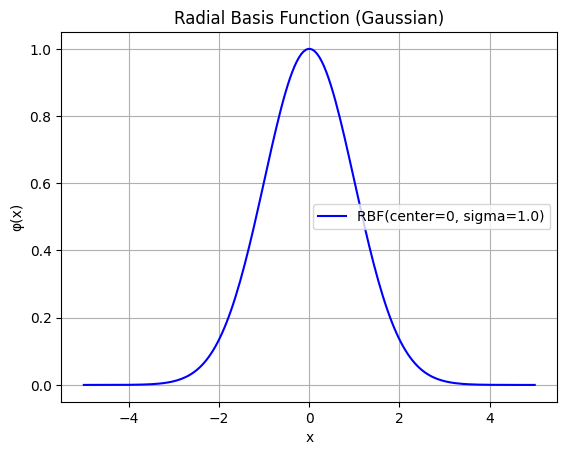

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian Radial Basis Function
def rbf(x, center, sigma):
    
    return np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Generate input values
x = np.linspace(-5, 5, 200)

# Parameters
center = 0       # center of the RBF
sigma = 1.0      # spread or width

# Compute RBF values
y = rbf(x, center, sigma)

# Plot the RBF
plt.plot(x, y, label=f'RBF(center={center}, sigma={sigma})', color='blue')
plt.title('Radial Basis Function (Gaussian)')
plt.xlabel('x')
plt.ylabel('φ(x)')
plt.legend()
plt.grid(True)
plt.show()
